In [3]:
# Frequent Patterns: Combinations of Features that occur frequently in the dataset

# Apriori Algorithm
# FP-Growth Algorithm
# We can realize more about relationships between different features

# Steps:
#      Pre-Process, missing values, remove irrelevant
#      Encode Dataset, each row a specific format of accident ( ex binary ) and each columnt a featuer
#      Choose sutable FP-Growth, Apriori Algorithm
#      Setting Minimum Support Threshold: define the minimum occurance
#      Extract Patterns: run algorithm, filter result that support threshold, 
#                      => output: list of frequent itemsets or patterns, combination of features occur frequently
#      Post-Processing, Analysis: analyze extracted patterns, Explore Association Rules
#      Interpret and Visulization


In [4]:
# Frequent Item se in a dataset

# Frequent Itemset = Association Rules
# A frequent itemset = A set of items that occur together frequently in dataset
# Support Count = Number of occurance that set in dataset

# Association Rule Mining Algoirhtms = such as : Apriori, FP-Growth -> output = frequent itemset
# they are iteratively generation algorithm -> output : {left-hand set} -> {candidate set}
# confidence = Number of occurance candidate / Number of occurance left-hand set
# these algorithms work by on-off of an item

# applications: in cross-selling and recommendation systems

# it’s good to put them together in stores or provide some discount offer on 
# one item on purchase of another item


In [5]:
# Defenitions:

# Support = ex 5% support means 5% of all transactions follow this rule
# Support ( A -> B ) = Support ( people who buy A and B ) / Support_count ( All Transactions )

# Confidence ( A -> B ) = Support_count ( A U B ) / Support_count ( A )
# ex Confidence ( A -> B ) = 60% means: 
#     Support_count ( people who buy A and B ) / Support_count ( people who buy A )

# If a rule satisfy both minimum support and minimum confidence its a strong rule


# Support_count ( X ) : Number of transactions that X occur 
# Support_count ( X U Y ) : Number of transactions that X and Y occur
    
# Maximal Itemset : an itemset is maximal if none of its superset are frequent

# Closed Itemset : none of its immediate supersets have same support count same as itemset


# PROS:
#     efficient
#     easy to interpret
#     can be used in wide range of application: finance, healthcare
#     handing large dataset

# CONS:
#     large number of rules
#     limited in detecting complex relationships
#     computationally expensive
#     need to define minimum support and confidence threshold
    


In [44]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Load Dataset

abs_path = Path.cwd()
data_address = abs_path.parent.parent / 'data/' / 'Cleaned_US.csv'
df = pd.read_csv(data_address)

In [9]:
# pip install mlxtend

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


In [10]:
# One-Shot Encoding on dataset

te = TransactionEncoder()
te

TransactionEncoder()

In [11]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [12]:
# Convert boolean columns to integers
bool_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
                'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
                'Traffic_Signal', 'Turning_Loop']
df[bool_columns] = df[bool_columns].astype(int)


# Apply Apriori algorithm
frequent_itemsets = apriori(df[bool_columns], min_support=0.3, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Show association rules
print("\nAssociation Rules:")
print(rules)

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


ValueError: The input DataFrame `df` containing the frequent itemsets is empty.

In [13]:
# Apply Apriori algorithm
frequent_itemsets = apriori(df[bool_columns], min_support=0.07, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Show association rules
print("\nAssociation Rules:")
print(rules)

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


Frequent Itemsets:
    support          itemsets
0  0.071072        (Crossing)
1  0.102037        (Junction)
2  0.093829  (Traffic_Signal)

Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [14]:
# Convert boolean columns to integers
bool_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
                'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
                'Traffic_Signal', 'Turning_Loop']
df[bool_columns] = df[bool_columns].astype(int)


# Apply Apriori algorithm
frequent_itemsets = apriori(df[bool_columns], min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Show association rules
print("\nAssociation Rules:")
print(rules)

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


Frequent Itemsets:
    support                    itemsets
0  0.071072                  (Crossing)
1  0.102037                  (Junction)
2  0.024013                   (Station)
3  0.093829            (Traffic_Signal)
4  0.038292  (Crossing, Traffic_Signal)

Association Rules:
        antecedents       consequents  antecedent support  consequent support  \
0        (Crossing)  (Traffic_Signal)            0.071072            0.093829   
1  (Traffic_Signal)        (Crossing)            0.093829            0.071072   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.038292    0.538784  5.742183  0.031624    1.964743       0.889036  
1  0.038292    0.408107  5.742183  0.031624    1.569420       0.911363  


In [15]:
# Convert boolean columns to integers
bool_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
                'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
                'Traffic_Signal', 'Turning_Loop']
df[bool_columns] = df[bool_columns].astype(int)


# Apply Apriori algorithm
frequent_itemsets = apriori(df[bool_columns], min_support=0.007, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Show association rules
print("\nAssociation Rules:")
print(rules)

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


Frequent Itemsets:
    support                    itemsets
0  0.009834                   (Amenity)
1  0.071072                  (Crossing)
2  0.102037                  (Junction)
3  0.007875                   (Railway)
4  0.024013                   (Station)
5  0.017672                      (Stop)
6  0.093829            (Traffic_Signal)
7  0.007370         (Station, Crossing)
8  0.038292  (Crossing, Traffic_Signal)
9  0.007178   (Station, Traffic_Signal)

Association Rules:
        antecedents       consequents  antecedent support  consequent support  \
0         (Station)        (Crossing)            0.024013            0.071072   
1        (Crossing)         (Station)            0.071072            0.024013   
2        (Crossing)  (Traffic_Signal)            0.071072            0.093829   
3  (Traffic_Signal)        (Crossing)            0.093829            0.071072   
4         (Station)  (Traffic_Signal)            0.024013            0.093829   
5  (Traffic_Signal)         (Statio

In [16]:
# Convert boolean columns to integers
bool_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
                'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
                'Traffic_Signal', 'Turning_Loop']
df[bool_columns] = df[bool_columns].astype(int)


# Apply Apriori algorithm
frequent_itemsets = apriori(df[bool_columns], min_support=0.003, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Show association rules
print("\nAssociation Rules:")
print(rules)

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


Frequent Itemsets:
     support                             itemsets
0   0.009834                            (Amenity)
1   0.071072                           (Crossing)
2   0.102037                           (Junction)
3   0.007875                            (Railway)
4   0.024013                            (Station)
5   0.017672                               (Stop)
6   0.093829                     (Traffic_Signal)
7   0.003677                  (Amenity, Crossing)
8   0.003514            (Amenity, Traffic_Signal)
9   0.005302                  (Crossing, Railway)
10  0.007370                  (Station, Crossing)
11  0.004208                     (Crossing, Stop)
12  0.038292           (Crossing, Traffic_Signal)
13  0.007178            (Station, Traffic_Signal)
14  0.003776  (Station, Crossing, Traffic_Signal)

Association Rules:
                   antecedents                 consequents  \
0                    (Amenity)                  (Crossing)   
1                   (Crossing)       

In [17]:
# Abnormaly Acts
# Convert boolean columns to integers
bool_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
                'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
                'Traffic_Signal', 'Turning_Loop']
df[bool_columns] = df[bool_columns].astype(int)


# Apply Apriori algorithm
frequent_itemsets = apriori(df[bool_columns], min_support=0.0005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Show association rules
print("\nAssociation Rules:")
print(rules)

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


Frequent Itemsets:
     support                                      itemsets
0   0.009834                                     (Amenity)
1   0.071072                                    (Crossing)
2   0.002402                                    (Give_Way)
3   0.102037                                    (Junction)
4   0.001524                                     (No_Exit)
5   0.007875                                     (Railway)
6   0.024013                                     (Station)
7   0.017672                                        (Stop)
8   0.000606                             (Traffic_Calming)
9   0.093829                              (Traffic_Signal)
10  0.003677                           (Amenity, Crossing)
11  0.002097                            (Station, Amenity)
12  0.000519                               (Amenity, Stop)
13  0.003514                     (Amenity, Traffic_Signal)
14  0.000845                          (Give_Way, Crossing)
15  0.000989                         

In [18]:
frequent_itemsets

,support,itemsets
0,0.009834,(Amenity)
1,0.071072,(Crossing)
2,0.002402,(Give_Way)
3,0.102037,(Junction)
4,0.001524,(No_Exit)
5,0.007875,(Railway)
6,0.024013,(Station)
7,0.017672,(Stop)
8,0.000606,(Traffic_Calming)
9,0.093829,(Traffic_Signal)


In [19]:
df

,Severity,Start_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,County,State,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Weekday,Hour,Month
0,3,2016-02-08 00:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Dublin,Franklin,OH,...,0,0,0,0,0,0,0,Monday,0,2
1,2,2016-02-08 05:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,Dayton,Montgomery,OH,...,0,0,0,0,0,0,0,Monday,5,2
2,2,2016-02-08 06:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,Cincinnati,Hamilton,OH,...,0,0,0,0,0,0,0,Monday,6,2
3,2,2016-02-08 06:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,Akron,Summit,OH,...,0,0,0,0,0,0,0,Monday,6,2
4,3,2016-02-08 07:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,Cincinnati,Hamilton,OH,...,0,0,0,0,0,0,0,Monday,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774570,2,2021-07-19 16:15:41,25.953810,-80.205651,25.942621,-80.205285,0.773,Miami,Miami-Dade,FL,...,0,0,1,0,0,0,0,Monday,16,7
2774571,2,2021-12-16 21:54:00,38.426953,-120.588087,38.426690,-120.587706,0.027,Pioneer,Amador,CA,...,0,0,0,0,0,0,0,Thursday,21,12
2774572,2,2021-12-12 16:12:00,39.750573,-84.191238,39.749632,-84.190979,0.066,Dayton,Montgomery,OH,...,0,0,0,0,0,0,0,Sunday,16,12
2774573,2,2021-05-01 11:28:00,39.754339,-84.192260,39.753289,-84.191977,0.074,Dayton,Montgomery,OH,...,0,0,0,0,0,0,0,Saturday,11,5


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774575 entries, 0 to 2774574
Data columns (total 34 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int64  
 1   Start_Time         object 
 2   Start_Lat          float64
 3   Start_Lng          float64
 4   End_Lat            float64
 5   End_Lng            float64
 6   Distance(mi)       float64
 7   City               object 
 8   County             object 
 9   State              object 
 10  Temperature(F)     float64
 11  Wind_Chill(F)      float64
 12  Humidity(%)        float64
 13  Pressure(in)       float64
 14  Visibility(mi)     float64
 15  Wind_Speed(mph)    float64
 16  Precipitation(in)  float64
 17  Weather_Condition  object 
 18  Amenity            int64  
 19  Bump               int64  
 20  Crossing           int64  
 21  Give_Way           int64  
 22  Junction           int64  
 23  No_Exit            int64  
 24  Railway            int64  
 25  Roundabout        

In [21]:
df

,Severity,Start_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,County,State,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Weekday,Hour,Month
0,3,2016-02-08 00:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Dublin,Franklin,OH,...,0,0,0,0,0,0,0,Monday,0,2
1,2,2016-02-08 05:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,Dayton,Montgomery,OH,...,0,0,0,0,0,0,0,Monday,5,2
2,2,2016-02-08 06:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,Cincinnati,Hamilton,OH,...,0,0,0,0,0,0,0,Monday,6,2
3,2,2016-02-08 06:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,Akron,Summit,OH,...,0,0,0,0,0,0,0,Monday,6,2
4,3,2016-02-08 07:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,Cincinnati,Hamilton,OH,...,0,0,0,0,0,0,0,Monday,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774570,2,2021-07-19 16:15:41,25.953810,-80.205651,25.942621,-80.205285,0.773,Miami,Miami-Dade,FL,...,0,0,1,0,0,0,0,Monday,16,7
2774571,2,2021-12-16 21:54:00,38.426953,-120.588087,38.426690,-120.587706,0.027,Pioneer,Amador,CA,...,0,0,0,0,0,0,0,Thursday,21,12
2774572,2,2021-12-12 16:12:00,39.750573,-84.191238,39.749632,-84.190979,0.066,Dayton,Montgomery,OH,...,0,0,0,0,0,0,0,Sunday,16,12
2774573,2,2021-05-01 11:28:00,39.754339,-84.192260,39.753289,-84.191977,0.074,Dayton,Montgomery,OH,...,0,0,0,0,0,0,0,Saturday,11,5


In [22]:
# Convert weather float columns to categorical
weather_float_columns = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
                         'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

# Define the thresholds for each weather column
thresholds = {
    'Temperature(F)': [0, 32, 70, float('inf')],
    'Wind_Chill(F)': [-float('inf'), 20, 50, float('inf')],
    'Humidity(%)': [0, 40, 70, 100],
    'Pressure(in)': [0, 29.5, 30, float('inf')],
    'Visibility(mi)': [0, 2, 5, float('inf')],
    'Wind_Speed(mph)': [0, 5, 10, float('inf')],
    'Precipitation(in)': [0, 0.01, 0.1, float('inf')]
}

# Discretize and encode weather columns using one-hot encoding
for column in weather_float_columns:
    bins = thresholds[column]
    labels = range(len(bins) - 1)
    categories = pd.cut(df[column], bins=bins, labels=labels)
    encoded_cols = pd.get_dummies(categories, prefix=column)
    df = pd.concat([df, encoded_cols], axis=1)

# Drop the original weather float columns
df.drop(weather_float_columns, axis=1, inplace=True)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774575 entries, 0 to 2774574
Data columns (total 48 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Severity             int64  
 1   Start_Time           object 
 2   Start_Lat            float64
 3   Start_Lng            float64
 4   End_Lat              float64
 5   End_Lng              float64
 6   Distance(mi)         float64
 7   City                 object 
 8   County               object 
 9   State                object 
 10  Weather_Condition    object 
 11  Amenity              int64  
 12  Bump                 int64  
 13  Crossing             int64  
 14  Give_Way             int64  
 15  Junction             int64  
 16  No_Exit              int64  
 17  Railway              int64  
 18  Roundabout           int64  
 19  Station              int64  
 20  Stop                 int64  
 21  Traffic_Calming      int64  
 22  Traffic_Signal       int64  
 23  Turning_Loop         int64  
 24

In [24]:
df

,Severity,Start_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,County,State,...,Pressure(in)_2,Visibility(mi)_0,Visibility(mi)_1,Visibility(mi)_2,Wind_Speed(mph)_0,Wind_Speed(mph)_1,Wind_Speed(mph)_2,Precipitation(in)_0,Precipitation(in)_1,Precipitation(in)_2
0,3,2016-02-08 00:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Dublin,Franklin,OH,...,0,0,0,1,0,0,1,0,0,0
1,2,2016-02-08 05:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,Dayton,Montgomery,OH,...,0,0,0,1,0,1,0,0,1,0
2,2,2016-02-08 06:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,Cincinnati,Hamilton,OH,...,0,0,0,1,0,1,0,0,1,0
3,2,2016-02-08 06:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,Akron,Summit,OH,...,0,0,0,1,0,1,0,1,0,0
4,3,2016-02-08 07:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,Cincinnati,Hamilton,OH,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774570,2,2021-07-19 16:15:41,25.953810,-80.205651,25.942621,-80.205285,0.773,Miami,Miami-Dade,FL,...,1,0,0,1,0,0,1,0,0,0
2774571,2,2021-12-16 21:54:00,38.426953,-120.588087,38.426690,-120.587706,0.027,Pioneer,Amador,CA,...,0,0,0,1,0,0,1,0,0,0
2774572,2,2021-12-12 16:12:00,39.750573,-84.191238,39.749632,-84.190979,0.066,Dayton,Montgomery,OH,...,0,0,0,1,0,0,1,0,0,0
2774573,2,2021-05-01 11:28:00,39.754339,-84.192260,39.753289,-84.191977,0.074,Dayton,Montgomery,OH,...,0,0,0,1,0,0,1,0,0,0


In [25]:
weather_float_columns = ['Temperature(F)_0', 'Temperature(F)_1', 'Temperature(F)_2',
                         'Wind_Chill(F)_0', 'Wind_Chill(F)_1', 'Wind_Chill(F)_2',
                         'Humidity(%)_0', 'Humidity(%)_1', 'Humidity(%)_2', 
                         'Pressure(in)_0', 'Humidity(%)_1', 'Humidity(%)_2', 
                         'Visibility(mi)_0', 'Visibility(mi)_1', 'Visibility(mi)_2', 
                         'Wind_Speed(mph)_0', 'Wind_Speed(mph)_1', 'Wind_Speed(mph)_2', 
                         'Precipitation(in)_0', 'Precipitation(in)_1', 'Precipitation(in)_2']

# Apply Apriori algorithm
frequent_itemsets = apriori(df[weather_float_columns], min_support=0.7, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Show association rules
print("\nAssociation Rules:")
print(rules)

# thresholds = {
#     'Temperature(F)': [0, 32, 70, float('inf')],
#     'Wind_Chill(F)': [-float('inf'), 20, 50, float('inf')],
#     'Humidity(%)': [0, 40, 70, 100],
#     'Pressure(in)': [0, 29.5, 30, float('inf')],
#     'Visibility(mi)': [0, 2, 5, float('inf')],
#     'Wind_Speed(mph)': [0, 5, 10, float('inf')],
#     'Precipitation(in)': [0, 0.01, 0.1, float('inf')]
# }

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


Frequent Itemsets:
    support            itemsets
0  0.753698   (Wind_Chill(F)_2)
1  0.899235  (Visibility(mi)_2)

Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [26]:
weather_float_columns = ['Temperature(F)_0', 'Temperature(F)_1', 'Temperature(F)_2',
                         'Wind_Chill(F)_0', 'Wind_Chill(F)_1', 'Wind_Chill(F)_2',
                         'Humidity(%)_0', 'Humidity(%)_1', 'Humidity(%)_2', 
                         'Pressure(in)_0', 'Humidity(%)_1', 'Humidity(%)_2', 
                         'Visibility(mi)_0', 'Visibility(mi)_1', 'Visibility(mi)_2', 
                         'Wind_Speed(mph)_0', 'Wind_Speed(mph)_1', 'Wind_Speed(mph)_2', 
                         'Precipitation(in)_0', 'Precipitation(in)_1', 'Precipitation(in)_2']

# Apply Apriori algorithm
frequent_itemsets = apriori(df[weather_float_columns], min_support=0.6, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Show association rules
print("\nAssociation Rules:")
print(rules)

# thresholds = {
#     'Temperature(F)': [0, 32, 70, float('inf')],
#     'Wind_Chill(F)': [-float('inf'), 20, 50, float('inf')],
#     'Humidity(%)': [0, 40, 70, 100],
#     'Pressure(in)': [0, 29.5, 30, float('inf')],
#     'Visibility(mi)': [0, 2, 5, float('inf')],
#     'Wind_Speed(mph)': [0, 5, 10, float('inf')],
#     'Precipitation(in)': [0, 0.01, 0.1, float('inf')]
# }

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


Frequent Itemsets:
    support                             itemsets
0  0.753698                    (Wind_Chill(F)_2)
1  0.899235                   (Visibility(mi)_2)
2  0.697797  (Wind_Chill(F)_2, Visibility(mi)_2)

Association Rules:
          antecedents         consequents  antecedent support  \
0   (Wind_Chill(F)_2)  (Visibility(mi)_2)            0.753698   
1  (Visibility(mi)_2)   (Wind_Chill(F)_2)            0.899235   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.899235  0.697797    0.925831  1.029576  0.020045    1.358587   
1            0.753698  0.697797    0.775990  1.029576  0.020045    1.099511   

   zhangs_metric  
0       0.116631  
1       0.285085  


In [27]:
weather_float_columns = ['Temperature(F)_0', 'Temperature(F)_1', 'Temperature(F)_2',
                         'Wind_Chill(F)_0', 'Wind_Chill(F)_1', 'Wind_Chill(F)_2',
                         'Humidity(%)_0', 'Humidity(%)_1', 'Humidity(%)_2', 
                         'Pressure(in)_0', 'Humidity(%)_1', 'Humidity(%)_2', 
                         'Visibility(mi)_0', 'Visibility(mi)_1', 'Visibility(mi)_2', 
                         'Wind_Speed(mph)_0', 'Wind_Speed(mph)_1', 'Wind_Speed(mph)_2', 
                         'Precipitation(in)_0', 'Precipitation(in)_1', 'Precipitation(in)_2']

# Apply Apriori algorithm
frequent_itemsets = apriori(df[weather_float_columns], min_support=0.5, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Show association rules
print("\nAssociation Rules:")
print(rules)

# thresholds = {
#     'Temperature(F)': [0, 32, 70, float('inf')],
#     'Wind_Chill(F)': [-float('inf'), 20, 50, float('inf')],
#     'Humidity(%)': [0, 40, 70, 100],
#     'Pressure(in)': [0, 29.5, 30, float('inf')],
#     'Visibility(mi)': [0, 2, 5, float('inf')],
#     'Wind_Speed(mph)': [0, 5, 10, float('inf')],
#     'Precipitation(in)': [0, 0.01, 0.1, float('inf')]
# }

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


Frequent Itemsets:
    support                             itemsets
0  0.562669                   (Temperature(F)_1)
1  0.753698                    (Wind_Chill(F)_2)
2  0.899235                   (Visibility(mi)_2)
3  0.697797  (Wind_Chill(F)_2, Visibility(mi)_2)

Association Rules:
          antecedents         consequents  antecedent support  \
0   (Wind_Chill(F)_2)  (Visibility(mi)_2)            0.753698   
1  (Visibility(mi)_2)   (Wind_Chill(F)_2)            0.899235   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.899235  0.697797    0.925831  1.029576  0.020045    1.358587   
1            0.753698  0.697797    0.775990  1.029576  0.020045    1.099511   

   zhangs_metric  
0       0.116631  
1       0.285085  


In [28]:
weather_float_columns = ['Temperature(F)_0', 'Temperature(F)_1', 'Temperature(F)_2',
                         'Wind_Chill(F)_0', 'Wind_Chill(F)_1', 'Wind_Chill(F)_2',
                         'Humidity(%)_0', 'Humidity(%)_1', 'Humidity(%)_2', 
                         'Pressure(in)_0', 'Humidity(%)_1', 'Humidity(%)_2', 
                         'Visibility(mi)_0', 'Visibility(mi)_1', 'Visibility(mi)_2', 
                         'Wind_Speed(mph)_0', 'Wind_Speed(mph)_1', 'Wind_Speed(mph)_2', 
                         'Precipitation(in)_0', 'Precipitation(in)_1', 'Precipitation(in)_2']

# Apply Apriori algorithm
frequent_itemsets = apriori(df[weather_float_columns], min_support=0.4, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Show association rules
print("\nAssociation Rules:")
print(rules)

# thresholds = {
#     'Temperature(F)': [0, 32, 70, float('inf')],
#     'Wind_Chill(F)': [-float('inf'), 20, 50, float('inf')],
#     'Humidity(%)': [0, 40, 70, 100],
#     'Pressure(in)': [0, 29.5, 30, float('inf')],
#     'Visibility(mi)': [0, 2, 5, float('inf')],
#     'Wind_Speed(mph)': [0, 5, 10, float('inf')],
#     'Precipitation(in)': [0, 0.01, 0.1, float('inf')]
# }

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


Frequent Itemsets:
    support                              itemsets
0  0.562669                    (Temperature(F)_1)
1  0.753698                     (Wind_Chill(F)_2)
2  0.442223                       (Humidity(%)_2)
3  0.442223                       (Humidity(%)_2)
4  0.899235                    (Visibility(mi)_2)
5  0.421931                   (Wind_Speed(mph)_1)
6  0.495006  (Visibility(mi)_2, Temperature(F)_1)
7  0.697797   (Wind_Chill(F)_2, Visibility(mi)_2)
8  0.442223                       (Humidity(%)_2)

Association Rules:
          antecedents         consequents  antecedent support  \
0   (Wind_Chill(F)_2)  (Visibility(mi)_2)            0.753698   
1  (Visibility(mi)_2)   (Wind_Chill(F)_2)            0.899235   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.899235  0.697797    0.925831  1.029576  0.020045    1.358587   
1            0.753698  0.697797    0.775990  1.029576  0.020045    1.099511   

   zhangs_metric  
0       

In [29]:
weather_float_columns = ['Temperature(F)_0', 'Temperature(F)_1', 'Temperature(F)_2',
                         'Wind_Chill(F)_0', 'Wind_Chill(F)_1', 'Wind_Chill(F)_2',
                         'Humidity(%)_0', 'Humidity(%)_1', 'Humidity(%)_2', 
                         'Pressure(in)_0', 'Humidity(%)_1', 'Humidity(%)_2', 
                         'Visibility(mi)_0', 'Visibility(mi)_1', 'Visibility(mi)_2', 
                         'Wind_Speed(mph)_0', 'Wind_Speed(mph)_1', 'Wind_Speed(mph)_2', 
                         'Precipitation(in)_0', 'Precipitation(in)_1', 'Precipitation(in)_2']

# Apply Apriori algorithm
frequent_itemsets = apriori(df[weather_float_columns], min_support=0.3, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Show association rules
print("\nAssociation Rules:")
print(rules)

# thresholds = {
#     'Temperature(F)': [0, 32, 70, float('inf')],
#     'Wind_Chill(F)': [-float('inf'), 20, 50, float('inf')],
#     'Humidity(%)': [0, 40, 70, 100],
#     'Pressure(in)': [0, 29.5, 30, float('inf')],
#     'Visibility(mi)': [0, 2, 5, float('inf')],
#     'Wind_Speed(mph)': [0, 5, 10, float('inf')],
#     'Precipitation(in)': [0, 0.01, 0.1, float('inf')]
# }

/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


Frequent Itemsets:
     support                                           itemsets
0   0.562669                                 (Temperature(F)_1)
1   0.363661                                 (Temperature(F)_2)
2   0.753698                                  (Wind_Chill(F)_2)
3   0.386941                                    (Humidity(%)_1)
4   0.442223                                    (Humidity(%)_2)
5   0.320209                                   (Pressure(in)_0)
6   0.386941                                    (Humidity(%)_1)
7   0.442223                                    (Humidity(%)_2)
8   0.899235                                 (Visibility(mi)_2)
9   0.421931                                (Wind_Speed(mph)_1)
10  0.386371                (Wind_Chill(F)_2, Temperature(F)_1)
11  0.495006               (Visibility(mi)_2, Temperature(F)_1)
12  0.363661                (Temperature(F)_2, Wind_Chill(F)_2)
13  0.351673               (Temperature(F)_2, Visibility(mi)_2)
14  0.308532         

In [30]:
df

,Severity,Start_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,County,State,...,Pressure(in)_2,Visibility(mi)_0,Visibility(mi)_1,Visibility(mi)_2,Wind_Speed(mph)_0,Wind_Speed(mph)_1,Wind_Speed(mph)_2,Precipitation(in)_0,Precipitation(in)_1,Precipitation(in)_2
0,3,2016-02-08 00:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Dublin,Franklin,OH,...,0,0,0,1,0,0,1,0,0,0
1,2,2016-02-08 05:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,Dayton,Montgomery,OH,...,0,0,0,1,0,1,0,0,1,0
2,2,2016-02-08 06:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,Cincinnati,Hamilton,OH,...,0,0,0,1,0,1,0,0,1,0
3,2,2016-02-08 06:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,Akron,Summit,OH,...,0,0,0,1,0,1,0,1,0,0
4,3,2016-02-08 07:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,Cincinnati,Hamilton,OH,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774570,2,2021-07-19 16:15:41,25.953810,-80.205651,25.942621,-80.205285,0.773,Miami,Miami-Dade,FL,...,1,0,0,1,0,0,1,0,0,0
2774571,2,2021-12-16 21:54:00,38.426953,-120.588087,38.426690,-120.587706,0.027,Pioneer,Amador,CA,...,0,0,0,1,0,0,1,0,0,0
2774572,2,2021-12-12 16:12:00,39.750573,-84.191238,39.749632,-84.190979,0.066,Dayton,Montgomery,OH,...,0,0,0,1,0,0,1,0,0,0
2774573,2,2021-05-01 11:28:00,39.754339,-84.192260,39.753289,-84.191977,0.074,Dayton,Montgomery,OH,...,0,0,0,1,0,0,1,0,0,0


/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,
/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,
/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,
/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/m

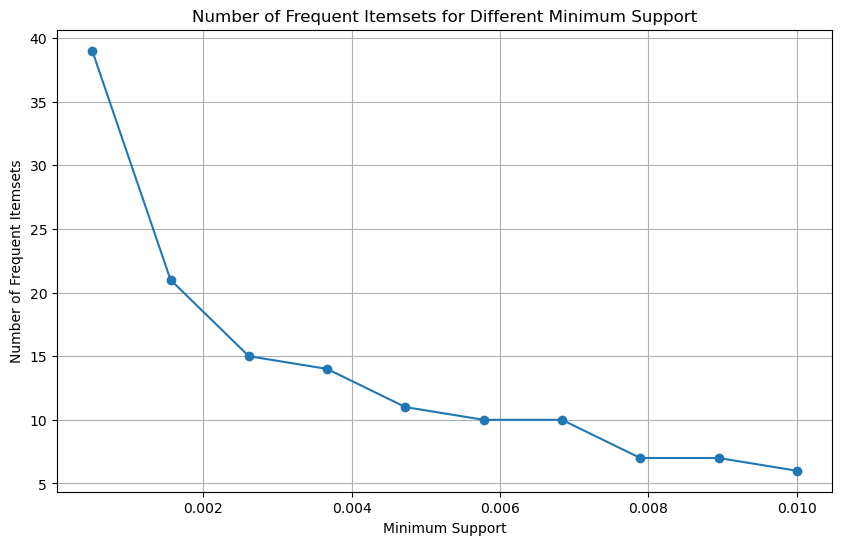

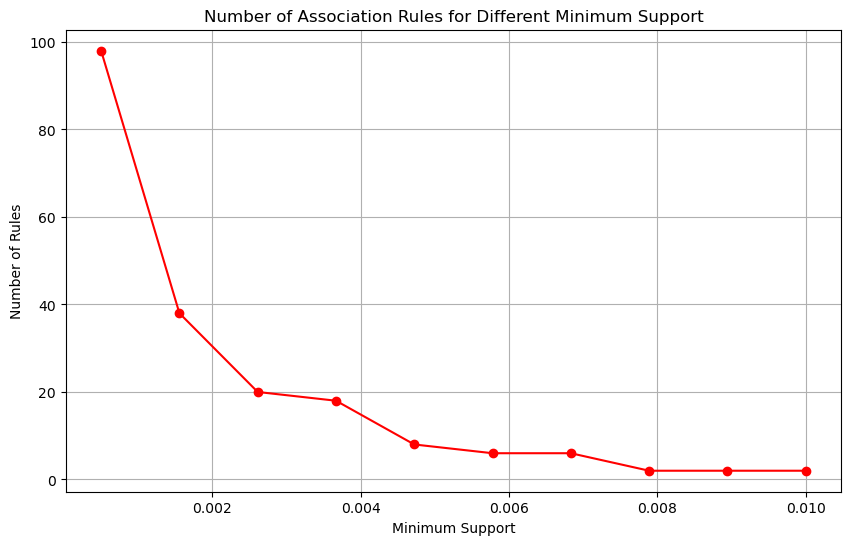

In [52]:
# Generate the minimum support values
min_support_values = np.linspace(0.0005, 0.01, num=10)

# Reverse the order of minimum support values
min_support_values = min_support_values[::-1]

num_frequent_itemsets = []
num_rules = []

for min_support in min_support_values:
    frequent_itemsets = apriori(df[bool_columns], min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    num_frequent_itemsets.append(len(frequent_itemsets))
    num_rules.append(len(rules))
    
# Plot number of frequent itemsets
plt.figure(figsize=(10, 6))
plt.plot(min_support_values, num_frequent_itemsets, marker='o')
plt.xlabel('Minimum Support')
plt.ylabel('Number of Frequent Itemsets')
plt.title('Number of Frequent Itemsets for Different Minimum Support')
plt.grid(True)
plt.savefig('frequent_itemsets_plot_traffic_sign.png')
plt.show()


# Plot number of rules
plt.figure(figsize=(10, 6))
plt.plot(min_support_values, num_rules, marker='o', color='r')
plt.xlabel('Minimum Support')
plt.ylabel('Number of Rules')
plt.title('Number of Association Rules for Different Minimum Support')
plt.grid(True)
plt.savefig('rules_count_plot_traffic_sign.png')
plt.show()



/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,
/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,
/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,
/home/abolfazl/anaconda3/envs/py37/lib/python3.7/site-packages/m

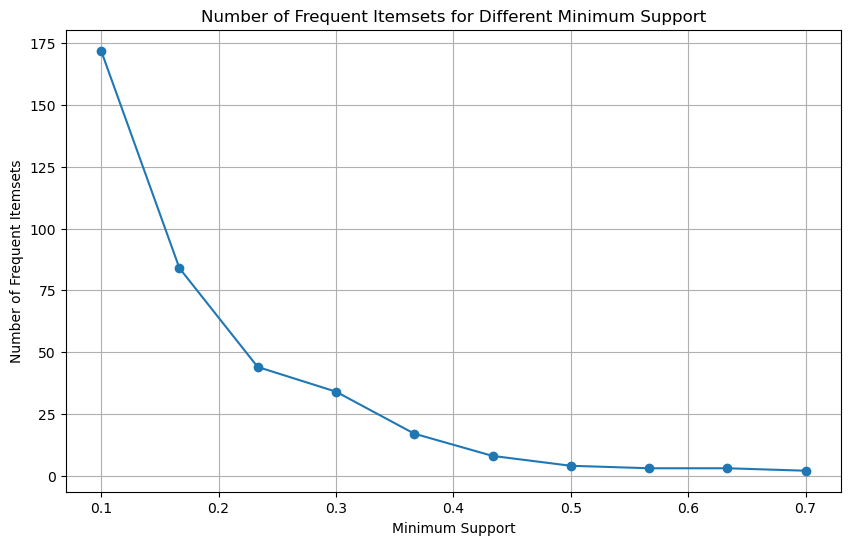

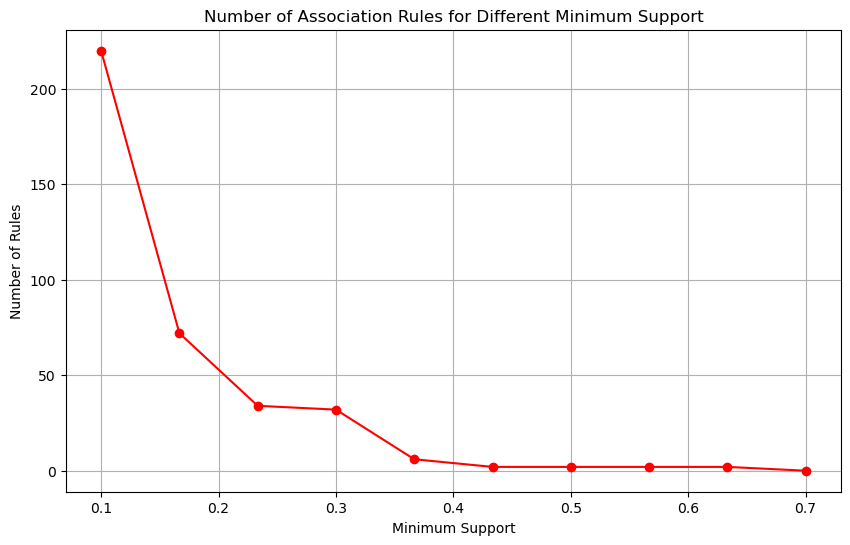

In [53]:
# Generate the minimum support values
min_support_values = np.linspace(0.1, 0.7, num=10)

# Reverse the order of minimum support values
min_support_values = min_support_values[::-1]

num_frequent_itemsets = []
num_rules = []

for min_support in min_support_values:
    frequent_itemsets = apriori(df[weather_float_columns], min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    num_frequent_itemsets.append(len(frequent_itemsets))
    num_rules.append(len(rules))
    
# Plot number of frequent itemsets
plt.figure(figsize=(10, 6))
plt.plot(min_support_values, num_frequent_itemsets, marker='o')
plt.xlabel('Minimum Support')
plt.ylabel('Number of Frequent Itemsets')
plt.title('Number of Frequent Itemsets for Different Minimum Support')
plt.grid(True)
plt.savefig('frequent_itemsets_plot_weather_condition.png')
plt.show()

# Plot number of rules
plt.figure(figsize=(10, 6))
plt.plot(min_support_values, num_rules, marker='o', color='r')
plt.xlabel('Minimum Support')
plt.ylabel('Number of Rules')
plt.title('Number of Association Rules for Different Minimum Support')
plt.grid(True)
plt.savefig('rules_count_plot_weather_condition.png')
plt.show()